# Fraud Detection Using Classification Algorithm
### Kaylynn Mosier
### 23 January 2025

In [114]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay

In [25]:
fraud_data = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC680/Weeks 5-8/transaction_dataset.csv")
fraud_data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# Data Preparation

In [27]:
# Drop unnamed 0 column
fraud_data.drop(['Unnamed: 0', 'Index'], inplace=True, axis=1)
fraud_data.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [29]:
# Check shape of dataset
fraud_data.shape

(9841, 49)

In [31]:
# Check data types
fraud_data.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

Address, ERC20_most_sent_token_type and ERC20_most_rec_token_type are all categorical variables.

In [33]:
# Remove categorical columns
fraud_data.drop(['Address',' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis=1, inplace=True)
fraud_data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


In [35]:
# Check number of na values
fraud_data.isna().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

There are quite a few missing values that will need to be dealth with before modeling.

In [37]:
# Fill NA values with median of column
fraud_data = fraud_data.fillna(fraud_data.median())

In [39]:
# Confirm NAs have been removed
fraud_data.isna().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [41]:
# Find number of transactions that are actually fraud
fraud_transactions = pd.DataFrame(fraud_data['FLAG'].value_counts())
fraud_transactions.reset_index(inplace=True)
fraud_transactions

,FLAG,count
0,0,7662
1,1,2179


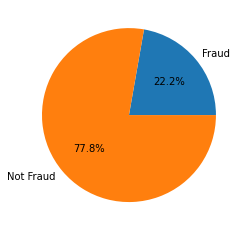

In [43]:
# Plot fraud vs non-fraud transactions in pie plot
labels = ('Fraud', 'Not Fraud')
sizes = [2179, 7622]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

There are many more non-fraud transactions than fraud transactions. This dataset in imbalanced, which will need to be accounted for in model building.

# Correlation Analysis

In [45]:
# Caluclate correlation
corr = fraud_data.corr()

# Find correlation of variables with FLAG
correlation_with_flag = corr['FLAG'].sort_values(ascending=False)
correlation_with_flag

FLAG                                                    1.000000
 ERC20 min val sent                                     0.019023
 ERC20 avg val sent                                     0.018835
 ERC20 max val sent                                     0.018770
 ERC20 total ether sent                                 0.018428
 ERC20 total Ether sent contract                        0.008127
min val sent                                            0.006626
 ERC20 min val rec                                      0.004434
 ERC20 avg val rec                                      0.003132
total ether balance                                    -0.003229
 ERC20 max val rec                                     -0.005510
 ERC20 total Ether received                            -0.005711
min value sent to contract                             -0.007213
max val sent to contract                               -0.007988
total ether sent contracts                             -0.007988
avg value sent to contrac

### Positively Correlation Featues:

### Negatively Correlated Features:

#### Columns with NaN in correlation with FLAG will be removed. The goal is to predict FLAG values, if correlation values are NaN they do not add to model building.

In [47]:
# Drop columns with NaN in correlation with FLAG
fraud_data.drop([' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', 
                 ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', 
                 ' ERC20 avg val sent contract'], axis=1, inplace=True)
                 

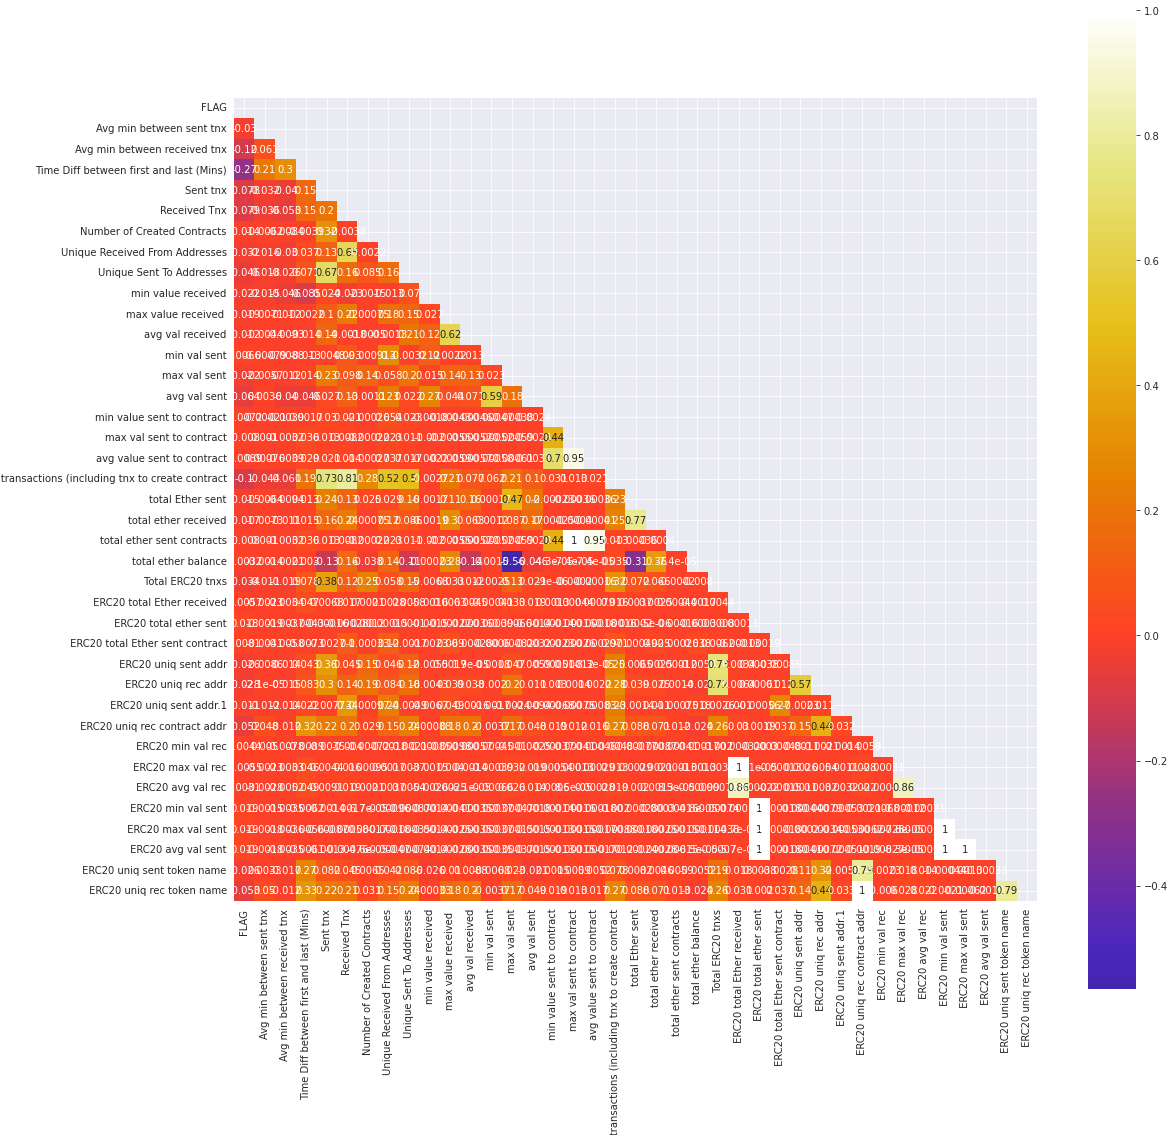

In [49]:
# Caluclate correlation
corr = fraud_data.corr()

# Plot lower triangle of correlation table
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, square=True)

There are numerous columns that appear to have collinearity. In each of the pairs displaying collinearity, one of the columns will be removed.

In [51]:
# Remove 1 from each pair of variables with correlation higher than 0.80
fraud_data.drop(['max val sent to contract', 'avg value sent to contract', ' ERC20 total Ether received', ' ERC20 total ether sent',
                ' ERC20 uniq rec contract addr', ' ERC20 min val sent', ' ERC20 max val sent','Received Tnx', 
                 ' ERC20 max val rec'], axis=1, inplace=True)

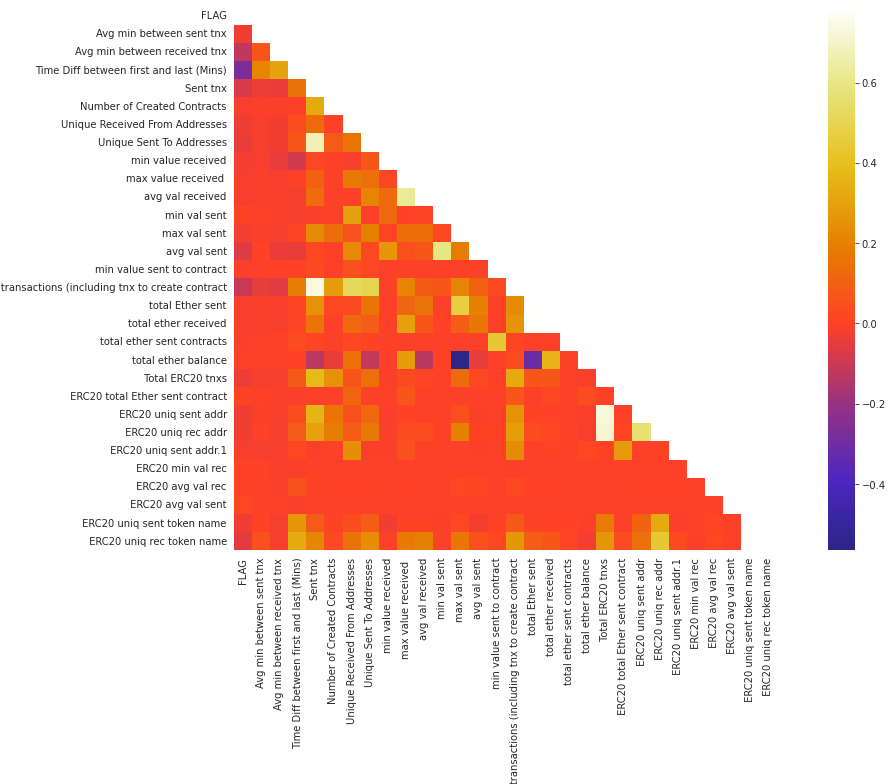

In [53]:
# Caluclate correlation
corr = fraud_data.corr()

# Plot lower triangle of correlation table
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

No variables have collinearity higher than 0.8.

# Feature Engineering

In [55]:
# Check variance of all variable
fraud_data.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                                            5.715935e+04
min value sent to contract        

No varaibles have a variance of 0, so no variables need to be removed due to variance.

In [57]:
# Get a list of all columns
columns = fraud_data.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 min val rec', ' ERC20 avg val rec',
       ' ERC20 avg val sent', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of  ERC20 uniq rec token name')

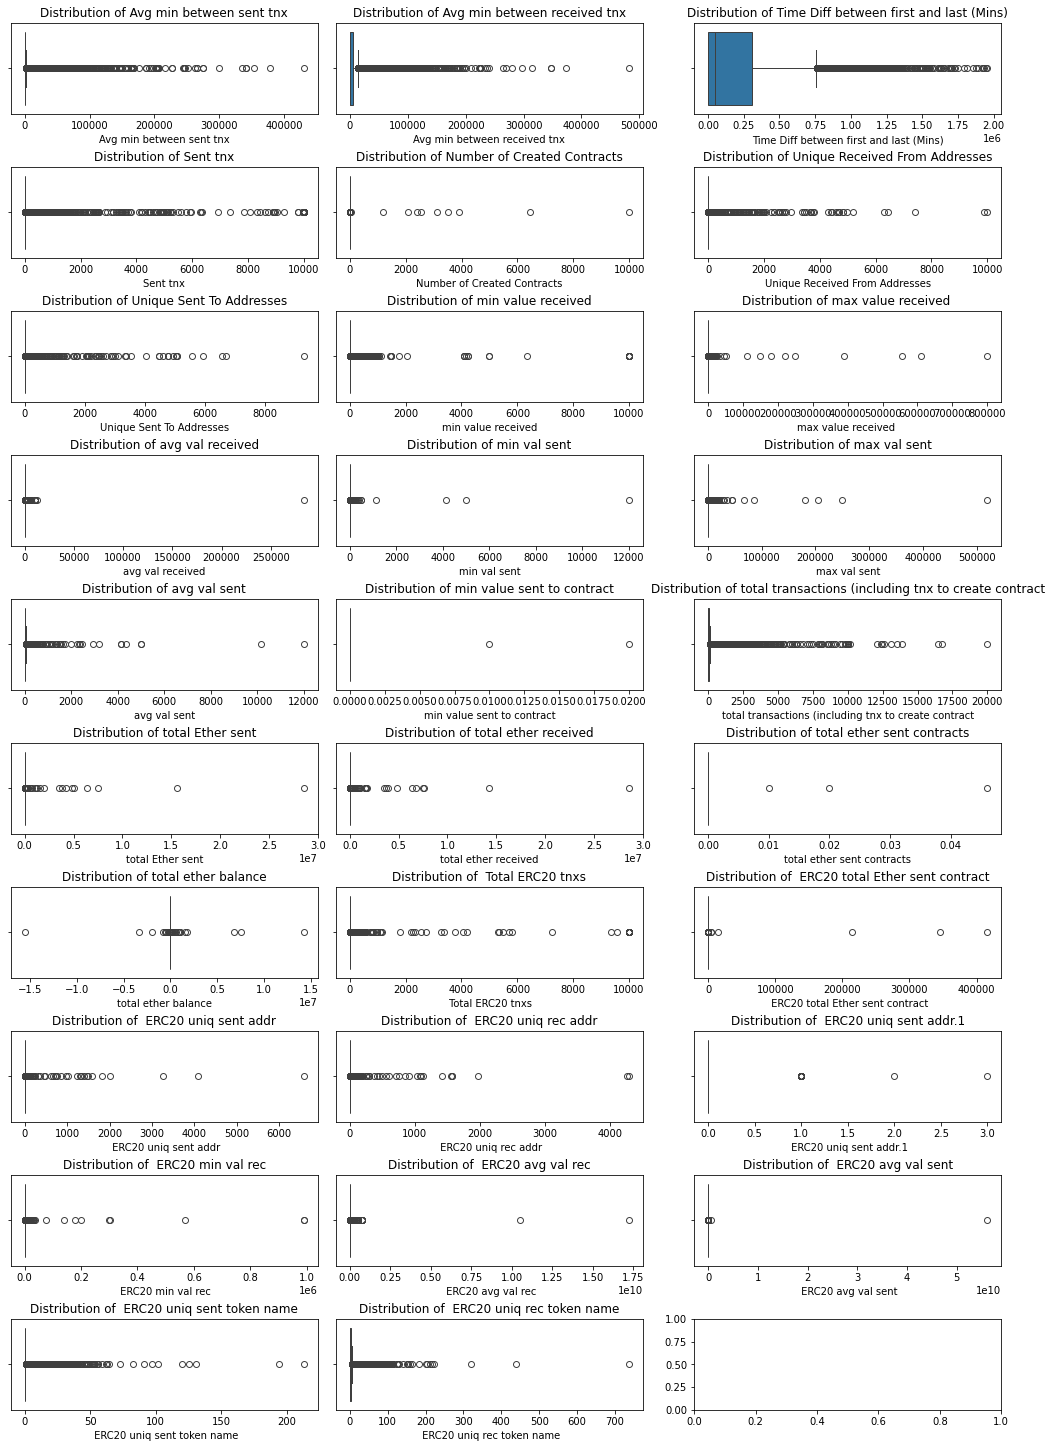

In [59]:
# Plot boxplot of all variable to view distribution
fig, axes = plt.subplots(10, 3, figsize=(14, 20), constrained_layout =True)

ax = sns.boxplot(ax = axes[0,0], data=fraud_data, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax = sns.boxplot(ax = axes[0,1], data=fraud_data, x=columns[2])
ax.set_title(f'Distribution of {columns[2]}')

ax = sns.boxplot(ax = axes[0,2], data=fraud_data, x=columns[3])
ax.set_title(f'Distribution of {columns[3]}')

ax = sns.boxplot(ax = axes[1,0], data=fraud_data, x=columns[4])
ax.set_title(f'Distribution of {columns[4]}')

ax = sns.boxplot(ax = axes[1,1], data=fraud_data, x=columns[5])
ax.set_title(f'Distribution of {columns[5]}')

ax = sns.boxplot(ax = axes[1,2], data=fraud_data, x=columns[6])
ax.set_title(f'Distribution of {columns[6]}')

ax = sns.boxplot(ax = axes[2,0], data=fraud_data, x=columns[7])
ax.set_title(f'Distribution of {columns[7]}')

ax = sns.boxplot(ax = axes[2,1], data=fraud_data, x=columns[8])
ax.set_title(f'Distribution of {columns[8]}')

ax = sns.boxplot(ax = axes[2,2], data=fraud_data, x=columns[9])
ax.set_title(f'Distribution of {columns[9]}')

ax = sns.boxplot(ax = axes[3,0], data=fraud_data, x=columns[10])
ax.set_title(f'Distribution of {columns[10]}')

ax = sns.boxplot(ax = axes[3,1], data=fraud_data, x=columns[11])
ax.set_title(f'Distribution of {columns[11]}')

ax = sns.boxplot(ax = axes[3,2], data=fraud_data, x=columns[12])
ax.set_title(f'Distribution of {columns[12]}')

ax = sns.boxplot(ax = axes[4,0], data=fraud_data, x=columns[13])
ax.set_title(f'Distribution of {columns[13]}')

ax = sns.boxplot(ax = axes[4,1], data=fraud_data, x=columns[14])
ax.set_title(f'Distribution of {columns[14]}')

ax = sns.boxplot(ax = axes[4,2], data=fraud_data, x=columns[15])
ax.set_title(f'Distribution of {columns[15]}')

ax = sns.boxplot(ax = axes[5,0], data=fraud_data, x=columns[16])
ax.set_title(f'Distribution of {columns[16]}')

ax = sns.boxplot(ax = axes[5,1], data=fraud_data, x=columns[17])
ax.set_title(f'Distribution of {columns[17]}')

ax = sns.boxplot(ax = axes[5,2], data=fraud_data, x=columns[18])
ax.set_title(f'Distribution of {columns[18]}')

ax = sns.boxplot(ax = axes[6,0], data=fraud_data, x=columns[19])
ax.set_title(f'Distribution of {columns[19]}')

ax = sns.boxplot(ax = axes[6,1], data=fraud_data, x=columns[20])
ax.set_title(f'Distribution of {columns[20]}')

ax = sns.boxplot(ax = axes[6,2], data=fraud_data, x=columns[21])
ax.set_title(f'Distribution of {columns[21]}')

ax = sns.boxplot(ax = axes[7,0], data=fraud_data, x=columns[22])
ax.set_title(f'Distribution of {columns[22]}')

ax = sns.boxplot(ax = axes[7,1], data=fraud_data, x=columns[23])
ax.set_title(f'Distribution of {columns[23]}')

ax = sns.boxplot(ax = axes[7,2], data=fraud_data, x=columns[24])
ax.set_title(f'Distribution of {columns[24]}')

ax = sns.boxplot(ax = axes[8,0], data=fraud_data, x=columns[25])
ax.set_title(f'Distribution of {columns[25]}')

ax = sns.boxplot(ax = axes[8,1], data=fraud_data, x=columns[26])
ax.set_title(f'Distribution of {columns[26]}')

ax = sns.boxplot(ax = axes[8,2], data=fraud_data, x=columns[27])
ax.set_title(f'Distribution of {columns[27]}')

ax = sns.boxplot(ax = axes[9,0], data=fraud_data, x=columns[28])
ax.set_title(f'Distribution of {columns[28]}')

ax = sns.boxplot(ax = axes[9,1], data=fraud_data, x=columns[29])
ax.set_title(f'Distribution of {columns[29]}')

Min value sent to contract appears to be a binary variable because all observations fall in either one of two points on the distribution. 

In [61]:
fraud_data['min value sent to contract'].value_counts()

min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64

Almost all observations for min value sent to contract column fall at 0.00. This will not add to the model so it will be removed from further analysis.

In [63]:
fraud_data.drop('min value sent to contract', axis=1, inplace=True)

In [65]:
# Split into target and features
y = fraud_data.iloc[:, 0] # separate FLAG as target varaible
X = fraud_data.iloc[:, 1:]

print(X.shape, y.shape)

(9841, 28) (9841,)


In [67]:
# Split into train and test sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 127)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 28) (7872,)
(1969, 28) (1969,)


The variation among the variables is highly different, as is the range. A scaler would help make this data more useable for machine learning. In this case, I will use PowerTransformer from sklearn because it normalizes data and deals with inconsistent variance. 

In [69]:
# Update columns list after removal of previous column
columns = X_train.columns

# Apply PowerTransformer to values
transformer = PowerTransformer()
normalized_train_features = pd.DataFrame(transformer.fit_transform(X_train), columns = columns)
normalized_test_features = pd.DataFrame(transformer.fit_transform(X_test), columns = columns)

Text(0.5, 1.0, 'Distribution of  ERC20 uniq rec token name')

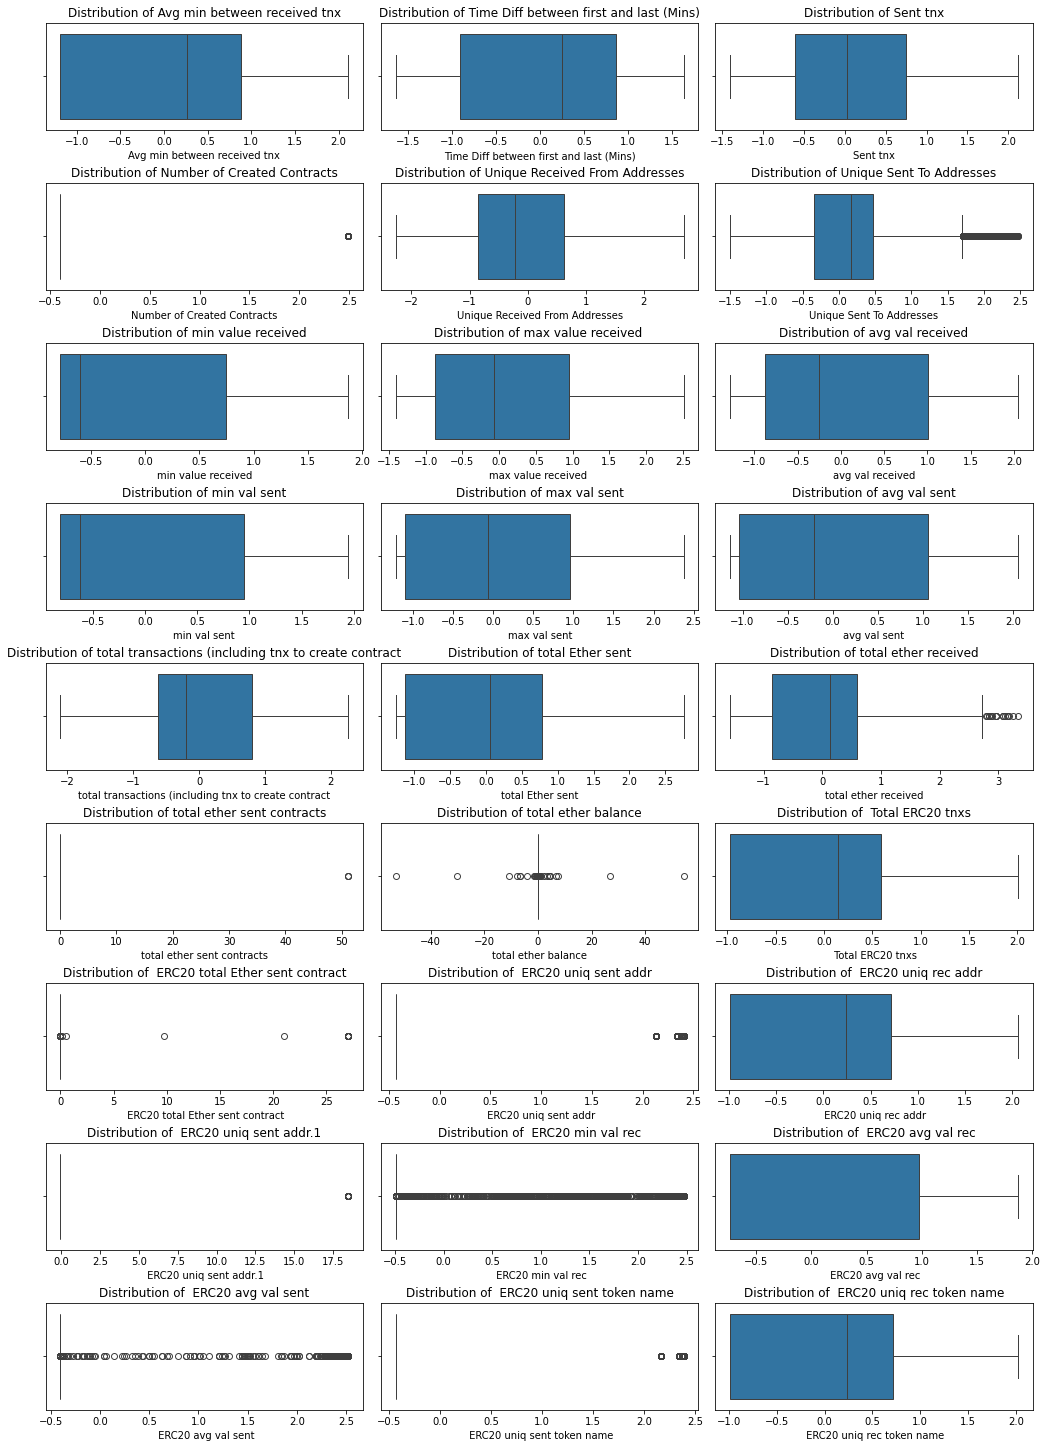

In [73]:
# Plot boxplot of all variable to view distribution
fig, axes = plt.subplots(9, 3, figsize=(14, 20), constrained_layout =True)

ax = sns.boxplot(ax = axes[0,0], data=normalized_train_features, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax = sns.boxplot(ax = axes[0,1], data=normalized_train_features, x=columns[2])
ax.set_title(f'Distribution of {columns[2]}')

ax = sns.boxplot(ax = axes[0,2], data=normalized_train_features, x=columns[3])
ax.set_title(f'Distribution of {columns[3]}')

ax = sns.boxplot(ax = axes[1,0], data=normalized_train_features, x=columns[4])
ax.set_title(f'Distribution of {columns[4]}')

ax = sns.boxplot(ax = axes[1,1], data=normalized_train_features, x=columns[5])
ax.set_title(f'Distribution of {columns[5]}')

ax = sns.boxplot(ax = axes[1,2], data=normalized_train_features, x=columns[6])
ax.set_title(f'Distribution of {columns[6]}')

ax = sns.boxplot(ax = axes[2,0], data=normalized_train_features, x=columns[7])
ax.set_title(f'Distribution of {columns[7]}')

ax = sns.boxplot(ax = axes[2,1], data=normalized_train_features, x=columns[8])
ax.set_title(f'Distribution of {columns[8]}')

ax = sns.boxplot(ax = axes[2,2], data=normalized_train_features, x=columns[9])
ax.set_title(f'Distribution of {columns[9]}')

ax = sns.boxplot(ax = axes[3,0], data=normalized_train_features, x=columns[10])
ax.set_title(f'Distribution of {columns[10]}')

ax = sns.boxplot(ax = axes[3,1], data=normalized_train_features, x=columns[11])
ax.set_title(f'Distribution of {columns[11]}')

ax = sns.boxplot(ax = axes[3,2], data=normalized_train_features, x=columns[12])
ax.set_title(f'Distribution of {columns[12]}')

ax = sns.boxplot(ax = axes[4,0], data=normalized_train_features, x=columns[13])
ax.set_title(f'Distribution of {columns[13]}')

ax = sns.boxplot(ax = axes[4,1], data=normalized_train_features, x=columns[14])
ax.set_title(f'Distribution of {columns[14]}')

ax = sns.boxplot(ax = axes[4,2], data=normalized_train_features, x=columns[15])
ax.set_title(f'Distribution of {columns[15]}')

ax = sns.boxplot(ax = axes[5,0], data=normalized_train_features, x=columns[16])
ax.set_title(f'Distribution of {columns[16]}')

ax = sns.boxplot(ax = axes[5,1], data=normalized_train_features, x=columns[17])
ax.set_title(f'Distribution of {columns[17]}')

ax = sns.boxplot(ax = axes[5,2], data=normalized_train_features, x=columns[18])
ax.set_title(f'Distribution of {columns[18]}')

ax = sns.boxplot(ax = axes[6,0], data=normalized_train_features, x=columns[19])
ax.set_title(f'Distribution of {columns[19]}')

ax = sns.boxplot(ax = axes[6,1], data=normalized_train_features, x=columns[20])
ax.set_title(f'Distribution of {columns[20]}')

ax = sns.boxplot(ax = axes[6,2], data=normalized_train_features, x=columns[21])
ax.set_title(f'Distribution of {columns[21]}')

ax = sns.boxplot(ax = axes[7,0], data=normalized_train_features, x=columns[22])
ax.set_title(f'Distribution of {columns[22]}')

ax = sns.boxplot(ax = axes[7,1], data=normalized_train_features, x=columns[23])
ax.set_title(f'Distribution of {columns[23]}')

ax = sns.boxplot(ax = axes[7,2], data=normalized_train_features, x=columns[24])
ax.set_title(f'Distribution of {columns[24]}')

ax = sns.boxplot(ax = axes[8,0], data=normalized_train_features, x=columns[25])
ax.set_title(f'Distribution of {columns[25]}')

ax = sns.boxplot(ax = axes[8,1], data=normalized_train_features, x=columns[26])
ax.set_title(f'Distribution of {columns[26]}')

ax = sns.boxplot(ax = axes[8,2], data=normalized_train_features, x=columns[27])
ax.set_title(f'Distribution of {columns[27]}')

Normalization has dealt with most outliers and made the variance more appropriate for modeling.

# Dealing with Imbalanced Classes

As displayed above, there is a large disparity in observations of fraud vs non-fraud records. Only 22% of observations are marked as fraud. To deal with this, I will use SMOTE to help account for this imbalance. SMOTE generates synthetic samples for the minority class which helps to minimize the imabalance in the dataset.

In [75]:
print(f'Shape of the training before SMOTE: {normalized_train_features.shape, y_train.shape}')

oversample = SMOTE()
X_train_resample, y_train_resample = oversample.fit_resample(normalized_train_features, y_train)
print(f'Shape of the training after SMOTE: {X_train_resample.shape, y_train_resample.shape}')

Shape of the training before SMOTE: ((7872, 28), (7872,))
Shape of the training after SMOTE: ((12312, 28), (12312,))


In [77]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_train_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'Before Oversampling \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'After Oversampling \n \tNon-frauds: {no} \n \tFauds: {yes}')

Before Oversampling 
 	Non-frauds: 6156 
 	Fauds: 1716
After Oversampling 
 	Non-frauds: 6156 
 	Fauds: 6157


Resampling using SMOTE has created equal classes in the dataset.

# Model Building

## Model Selection
Create pipeline to test Logistic Regression, Random Forest, Decision Tree along with hyperparameters for each model.

In [81]:
# Initialize logistic regression
logistic_regression = LogisticRegression()

# Create pipeline
pipe = Pipeline([('classifier', logistic_regression)]) #logistic_regression is just a placeholder

# Create search space
search_space = [{'classifier': [LogisticRegression(max_iter=500, solver='liblinear')]},
                {'classifier': [RandomForestClassifier()]},
                {'classifier': [DecisionTreeClassifier()]},
               {'classifier': [KNeighborsClassifier()]}]

In [83]:
# Create grid search
gridsearch = GridSearchCV(pipe, search_space, scoring='accuracy')

# fitting the data in the pipe
model = gridsearch.fit(X_train_resample, y_train_resample)

In [85]:
# scoring data 
gridsearch.best_params_

{'classifier': RandomForestClassifier()}

According to the GridSearchCV, RandomForest is the best classifier for this problem, when looking only at accuracy. Howerver, there are other factors to consider in the model evaluation. 

The impacts of false positives and false negatives must be evaluated from the business standpoint. This model is meant to predict fraudulent transactions where false negatives (meaning a transaction is fraud, but is not marked as fraud) are higly impactful to business operations because they result in a loss of income for the company. On the other hand, false positives (when a transaction is marked as fraud but it is a real transaction) is less of a concern. To create the best model for this task, we must evaluate Type I and Type II error.

In [87]:
# Make predictions with model
predictions = model.predict(normalized_test_features)

# Check accuracy
print('Accuracy:', accuracy_score(y_test, predictions)) 

Accuracy: 0.9827323514474352


This model achieved 82% accuracy, which is fine for a first run but is not high enough for deployment. There must by hyperparameters that can be better tuned.

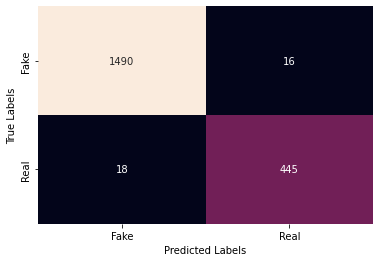

In [109]:
conf_matrix = confusion_matrix(y_test, predictions)

ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Fake', 'Real'])
ax.yaxis.set_ticklabels(['Fake', 'Real'])
plt.show()

This model has incorrectly predicted 34 samples. 18 of those are false negatives while 6 of those are false positives. In this context, it is preferrable to have more false positives than false negatives because that ensures we are not accidentally letting fraud transactions fall through the cracks. 

It is possible to still improve accuracy and type I/II errros, so I will try additional hyperparameter tuning on the RandomForest classifier.

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.97      0.96      0.96       463

    accuracy                           0.98      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.98      0.98      0.98      1969



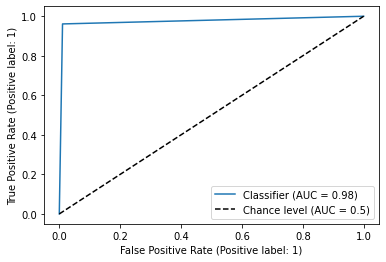

In [167]:
# Plot ROC / AUC plot
RocCurveDisplay.from_predictions(y_test, predictions, plot_chance_level= True)
plt.show()

It is very unlikely that any hyperparameter tuning will further increase precision, recall or F1 score because they are all almost 1.0 to begin with.

## Hyperparameter Tuning

In [157]:
# Define the parameter grid
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_resample, y_train_resample)

# Print the best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [159]:
# Make predictions with model
predictions_tuned = model.predict(normalized_test_features)

# Check accuracy
print('Accuracy:', accuracy_score(y_test, predictions_tuned)) 

Accuracy: 0.9827323514474352


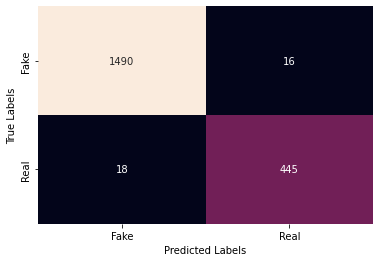

In [161]:
# Plot confusion matrix for tuned model
conf_matrix_tuned = confusion_matrix(y_test, predictions_tuned)

ax = plt.subplot()
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Fake', 'Real'])
ax.yaxis.set_ticklabels(['Fake', 'Real'])
plt.show()

In [163]:
print(classification_report(y_test, predictions_tuned))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.97      0.96      0.96       463

    accuracy                           0.98      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.98      0.98      0.98      1969



Hyperparameter tuning did not further improve the accuracy or Type I or II error rates.

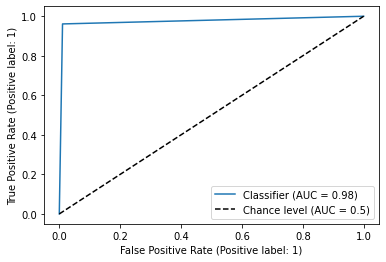

In [165]:
# Plot ROC / AUC plot
RocCurveDisplay.from_predictions(y_test, predictions_tuned, plot_chance_level= True)
plt.show()

A perfect AUC is 1.0. This model has achieved an AUC of 0.98 which is exceptional.